# **Google drive mount**
Mounting Google drive to access files

In [0]:
## Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Clone GitHub**
Cloning Github gives access to all scripts and files of model.

In [0]:
! git clone https://github.com/vivekvivs42/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2820 (delta 1), reused 0 (delta 0), pack-reused 2814
Receiving objects: 100% (2820/2820), 35.98 MiB | 9.89 MiB/s, done.
Resolving deltas: 100% (1811/1811), done.


In [0]:
cd ./darkflow/

/content/darkflow


# **Python environment**

In [0]:
! python3 setup.py build_ext --inplace



Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [0]:
! pip install -e 


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


In [0]:
! pip install .

Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=831108 sha256=a57994196627507cd07ad65c6ab73cfc969a70bac1d391886f163568ec35864b
  Stored in directory: /tmp/pip-ephem-wheel-cache-agds5i27/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow


# **Importing Libraries**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2


In [0]:
ls

build/  ckpt/      demo.gif  labels.txt  preview.png  sample_img/  test/
cfg/    darkflow/  flow*     LICENSE     README.md    setup.py     YOLO.ipynb


# **Building model**
loading all the necessary data for training.

In [0]:
options = {"model": "/content/darkflow/cfg/yolov2-voc-20c.cfg", 
          "load": "/content/gdrive/My Drive/Machine Learning/yolov2-voc.weights",
          "batch": 27,
          "epoch": 1,
          "gpu": 1.0,
          "train": True,
          "annotation": "/content/gdrive/My Drive/Machine Learning/Annotations",
          "dataset": "/content/gdrive/My Drive/Machine Learning/JPEGImages"}
    
   

In [0]:

tfnet = TFNet(options)


Parsing ./cfg/yolov2-voc.cfg
Parsing /content/darkflow/cfg/yolov2-voc-20c.cfg
Loading /content/gdrive/My Drive/Machine Learning/yolov2-voc.weights ...
Successfully identified 202704264 bytes
Finished in 0.6309521198272705s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     |

# **Training the model**

In [0]:
tfnet.train()


/content/darkflow/cfg/yolov2-voc-20c.cfg parsing /content/gdrive/My Drive/Machine Learning/Annotations
Parsing for ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle', 'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable', 'Dog', 'Horse', 'Motorbike', 'Person', 'Pottedplant', 'Sheep', 'Sofa', 'Train', 'Tvmonitor'] 
[====================>]100%  001889.xml
Statistics:
Dataset size: 4952
Dataset of 4952 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 27
	Epoch number  : 1
	Backup every  : 2000
step 1 - loss 1.4124804735183716 - moving ave loss 1.4124804735183716
step 2 - loss 1.476540207862854 - moving ave loss 1.4188864469528197
step 3 - loss 1.5369013547897339 - moving ave loss 1.4306879377365114
step 4 - loss 1.7971597909927368 - moving ave loss 1.467335123062134
step 5 - loss 1.888548493385315 - moving ave loss 1.5094564600944522
step 6 - loss 1.964255690574646 - moving ave loss 1.5549363831424716
step 7 - loss 2.1589879989624023 - moving ave loss 1.6153415447244

# **Saving the Chackpoint**
the checkpoint will be save inside darkflow in a folder build_graph.

In [0]:
tfnet.savepb()



# Model implementation from **checkpoint**
At **load:** the checkpoint step must be mentioned.

In [0]:
options = {"model": "cfg/yolov2-voc-20c.cfg",
           "load": 183,
           "gpu": 1.0,
          "threshold":0.01,
          "pbLoad":"/content/darkflow/built_graph/yolov2-voc-20c.pb" ,
          "metaLoad":"/content/darkflow/built_graph/yolov2-voc-20c.meta"}



In [0]:
tfnet2 = TFNet(options)



Loading from .pb and .meta
Instructions for updating:
Use tf.gfile.GFile.
GPU mode with 1.0 usage


In [0]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2-voc-20c-183
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ckpt/yolov2-voc-20c-183
Resolving old graph def ./ckpt/yolov2-voc-20c-183 (no guarantee)


# Passing Image into saved model for Result
An Image is passed into the saved model after the trainig to get the result from trained model.

A list fo detected object will be shown in a array

In [0]:
import pprint as pp
original_img = cv2.imread("/content/gdrive/My Drive/Machine Learning/ancient-architecture-buildings-1583704.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)


[{'label': 'Person', 'confidence': 0.034208287, 'topleft': {'x': 466, 'y': 621}, 'bottomright': {'x': 599, 'y': 799}}, {'label': 'Bicycle', 'confidence': 0.02008098, 'topleft': {'x': 303, 'y': 722}, 'bottomright': {'x': 580, 'y': 799}}, {'label': 'Bird', 'confidence': 0.011652738, 'topleft': {'x': 174, 'y': 0}, 'bottomright': {'x': 247, 'y': 23}}, {'label': 'Bird', 'confidence': 0.030274983, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 450, 'y': 77}}, {'label': 'Bird', 'confidence': 0.010069992, 'topleft': {'x': 216, 'y': 2}, 'bottomright': {'x': 297, 'y': 23}}, {'label': 'Bird', 'confidence': 0.010500371, 'topleft': {'x': 313, 'y': 46}, 'bottomright': {'x': 382, 'y': 115}}, {'label': 'Person', 'confidence': 0.03997271, 'topleft': {'x': 395, 'y': 762}, 'bottomright': {'x': 568, 'y': 797}}, {'label': 'Bird', 'confidence': 0.023243634, 'topleft': {'x': 448, 'y': 758}, 'bottomright': {'x': 599, 'y': 797}}, {'label': 'Bird', 'confidence': 0.015818415, 'topleft': {'x': 551, 'y': 748}, 

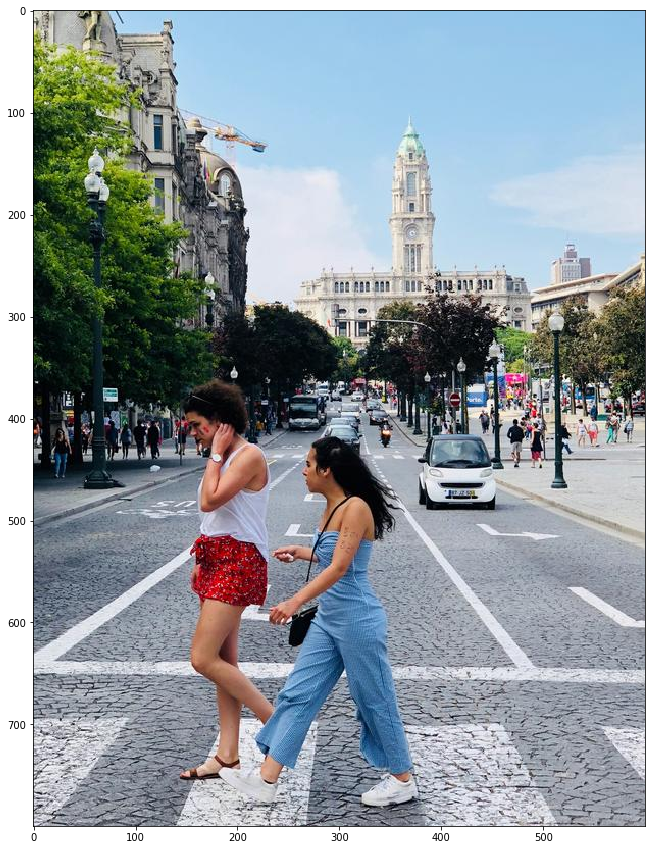

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.01:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

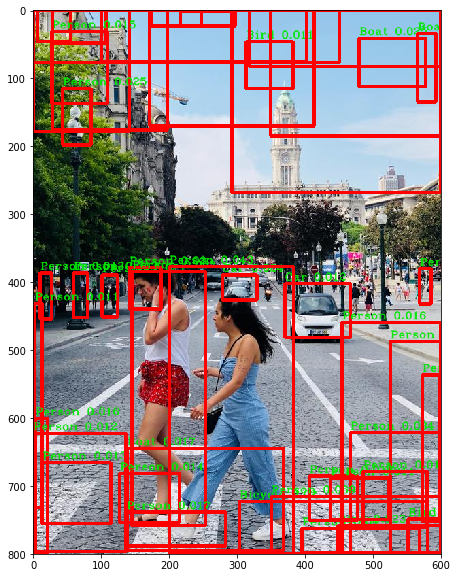

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

# Running inference on Pre-trained model

Need to run the below cells after importing Libraries to get the result for running inference on pre-trained model only.



In [0]:
 preoptions = {"model": "/content/darkflow/cfg/yolov2-voc-20c.cfg", 
           "load": "/content/gdrive/My Drive/Machine Learning/yolov2-voc.weights", 
           "train": False,
          "threshold":0.01}

In [0]:
Pretfnet = TFNet(preoptions)

Parsing ./cfg/yolov2-voc.cfg
Parsing /content/darkflow/cfg/yolov2-voc-20c.cfg
Loading /content/gdrive/My Drive/Machine Learning/yolov2-voc.weights ...
Successfully identified 202704264 bytes
Finished in 0.06706571578979492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

# **Passing Image into Pre-Trained model for Result**
An Image is passed into the pre-trained model  to get the result from per-trained model.



In [0]:
import pprint as pp
original_img = cv2.imread("/content/gdrive/My Drive/Machine Learning/ancient-architecture-buildings-1583704.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = Pretfnet.return_predict(original_img)
print(results)

[{'label': 'Person', 'confidence': 0.075188205, 'topleft': {'x': 11, 'y': 389}, 'bottomright': {'x': 29, 'y': 452}}, {'label': 'Car', 'confidence': 0.076304786, 'topleft': {'x': 246, 'y': 387}, 'bottomright': {'x': 277, 'y': 416}}, {'label': 'Car', 'confidence': 0.27780595, 'topleft': {'x': 283, 'y': 396}, 'bottomright': {'x': 327, 'y': 427}}, {'label': 'Car', 'confidence': 0.1082777, 'topleft': {'x': 328, 'y': 398}, 'bottomright': {'x': 358, 'y': 428}}, {'label': 'Car', 'confidence': 0.012531411, 'topleft': {'x': 384, 'y': 385}, 'bottomright': {'x': 417, 'y': 437}}, {'label': 'Car', 'confidence': 0.04517151, 'topleft': {'x': 416, 'y': 373}, 'bottomright': {'x': 459, 'y': 440}}, {'label': 'Person', 'confidence': 0.041695092, 'topleft': {'x': 466, 'y': 387}, 'bottomright': {'x': 493, 'y': 441}}, {'label': 'Person', 'confidence': 0.25812426, 'topleft': {'x': 276, 'y': 405}, 'bottomright': {'x': 334, 'y': 486}}, {'label': 'Car', 'confidence': 0.06801537, 'topleft': {'x': 312, 'y': 404}, '

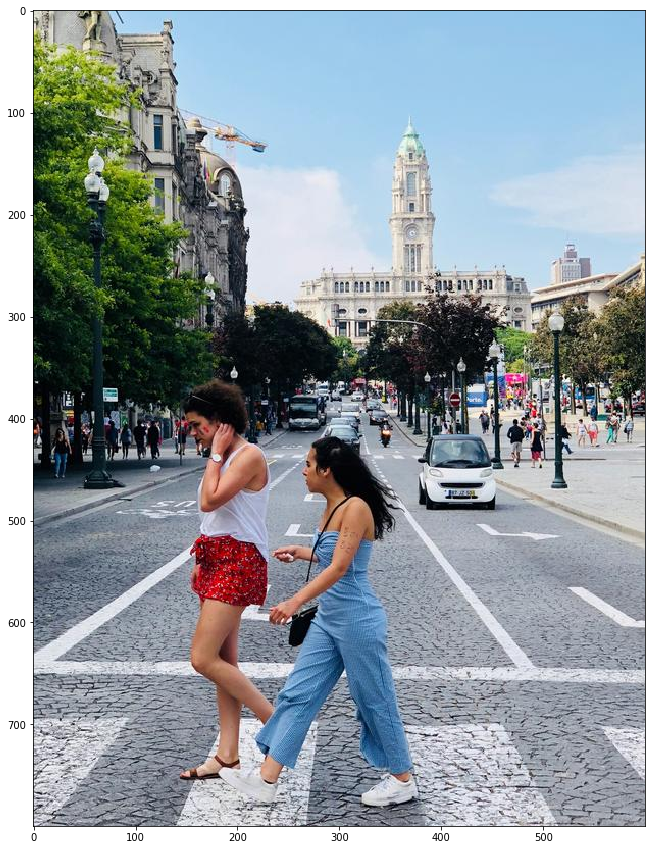

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

# New Section

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.01:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

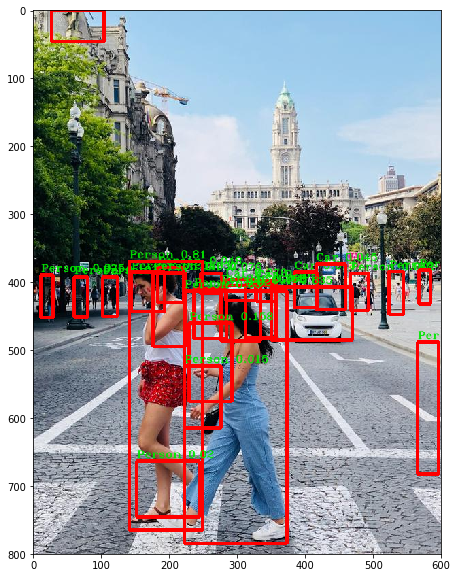

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))